In [14]:
from fx_list import get_data
from fx_list import correlation
from api_key import g_key
import matplotlib.pyplot as plt
import scipy.stats as sts
import pandas as pd
import gmaps
import os

gym_data = pd.read_csv("data_sources/US_states_gyms_2019.csv")
pactive_data = pd.read_csv("data_sources/physical_activeness_states_2019.csv")
statelatlong = pd.read_csv("data_sources/statelatlong.csv") #for maps

#merge gym data and physical activeness data, dropping duplicated columns then rename
activeness_df = pd.merge(gym_data, pactive_data, on='alpha code', how='right')
activeness_df = activeness_df.drop(columns=['state_y', 'state code_y'])
activeness_df.rename(columns ={'state_x': 'State','state code_x': 'State Code'}, inplace = True)
activeness_df['State'] = activeness_df['State'].str.title() #capitalise State names so can be merged with obesity_data

get_data('Obesity')

obesity_data = pd.read_csv("data_sources/obtained_data_Obesity.csv")
obesity_data
#checking with obesity_data before renaming and dropping unwanted rows and columns 
obesity_data.rename(columns={'State Name':'State', 'Value': 'Obesity'}, inplace = True) # rename column NAME to State to match up with activeness_df 
obesity_data = obesity_data.drop(columns=['Report Type', 'Measure Name', 'Score', 'Lower CI', 'Upper CI', 'Source', 'Source Year', 'Rank', 'Edition']) #don't need these, dropping them
obesity_data= obesity_data.drop([50,51]) #dropping index number for District of Columbia and United States

statelatlong.rename(columns={'state':'State'}, inplace = True) #preparing statelatlong for merging
statelatlong = statelatlong.drop(columns=['abbreviation']) #not needed as other DF already have this data

#merge activeness_df with obesity_data
obesevactive_df = pd.merge(activeness_df, obesity_data, how='outer')
obesevactive_df = pd.merge(obesevactive_df, statelatlong, how ='outer')
obesevactive_df.reset_index(drop=True, inplace=True)
obesevactive_df = obesevactive_df.drop([50]) #index 50 is District of Columbia, don't need this data

#output csv file
obesevactive_df.to_csv('data_sources\obese_vs_activeness.csv',index = False, header=True)


#importing obesity data from FastFood_FinalData.ipynb
fastfood_data = pd.read_csv('data_sources\FastFood_vs_Obesity.csv')

obesevactive_df['Population'] = fastfood_data['Population (2019)'] 
obesevactive_df['No. Of FF Restaurants'] = fastfood_data['Number of Fast Food Restaurants ']
 
fastfood_data

,State,State Code,Alpha Code,Per 10K Residents FastFood Restaurants Per Capita,Number of Fast Food Restaurants,Population (2019),Edition,Rank,% Obesity
0,Alabama,1.0,AL,6.3,4442.0,4903185.0,2019,45.0,36.2
1,Alaska,2.0,AK,2.6,411.0,731545.0,2019,15.0,29.5
2,Arizona,4.0,AZ,4.6,4388.0,7278717.0,2019,15.0,29.5
3,Arkansas,5.0,AR,4.7,2364.0,3017825.0,2019,48.0,37.1
4,California,6.0,CA,3.6,31473.0,39512223.0,2019,5.0,25.8
5,Connecticut,9.0,CT,2.4,2616.0,3565287.0,2019,7.0,27.4
6,Delaware,10.0,DE,4.1,785.0,973764.0,2019,33.0,33.5
7,Florida,12.0,FL,3.3,15073.0,21477737.0,2019,24.0,30.7
8,Georgia,13.0,GA,4.9,8749.0,10617423.0,2019,30.0,32.5
9,Idaho,16.0,ID,3.8,1244.0,1787065.0,2019,12.0,28.4


The correlation between both factors is -0.73
The correlation between both factors is 0.73


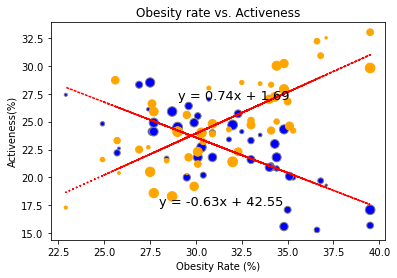

In [2]:
#let's try to see if the CDC is right on physical activeness by identifying the relationship between activeness and obesity 
size = [2*n for n in range(len(obesevactive_df['Obesity']))]
ax = plt.gca()
ax.scatter(obesevactive_df['Obesity'], obesevactive_df['meets cdc requirement (%)'], color='blue', s = size, edgecolors="gray")
ax.scatter(obesevactive_df['Obesity'], obesevactive_df['prevalance of inactivity'], color='orange', s = size)
plt.title(f'Obesity rate vs. Activeness')
plt.xlabel('Obesity Rate (%)')
plt.ylabel('Activeness(%)')

#dropping State: New Jersey as no data is available for Activeness
no_newjersey= obesevactive_df.drop([29])

#call correlation function to get the linear correlation for Obesity and Activeness
correlation(no_newjersey['Obesity'], no_newjersey['meets cdc requirement (%)'], 28, 17.5)
correlation(obesevactive_df['Obesity'], obesevactive_df['prevalance of inactivity'], 29, 27)

plt.savefig("output/obese_vs_active.png", dpi = 300) #set higher dpi for clearer plot

plt.show()

As one of the causes of Obesity defined by the CDC is due to physical inactivity, there is a strong (but not perfect) negative relationship between Obesity rate and physical activeness (R= -0.73) while a positive strong relationship between Obesity rate and physical inactivity (R = 0.73). This proves that the state residents that meets the CDC's physical activeness requirements have a lower obesity rate, hence proving the hypothesis.

The correlation between both factors is -0.34


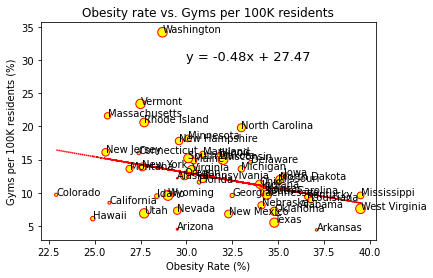

In [3]:
size = [2*n for n in range(len(obesevactive_df['Obesity']))]
plt.scatter(obesevactive_df['Obesity'], obesevactive_df['per 100K residents (%)'], color='yellow', s = size, edgecolors="red")
plt.title(f'Obesity rate vs. Gyms per 100K residents')
plt.xlabel('Obesity Rate (%)')
plt.ylabel('Gyms per 100K residents (%)')

#call correlation function to get the linear correlation for Obesity and Per 100K residents
correlation(obesevactive_df['Obesity'], obesevactive_df['per 100K residents (%)'], 30, 30)

#to print out names on plots
for n, txt in enumerate(obesevactive_df['State']):
    plt.annotate(txt, (obesevactive_df['Obesity'][n], obesevactive_df['per 100K residents (%)'][n]))
#the above can be commented out if scatterplot looks junky. enable just to have a look.

plt.savefig("output/obese_vs_gyms.png", dpi = 300)

The relationship between the Obesity Rate of a state and available Gyms per 100K state residents is a low negative (weak) correlation with the R-value of -0.34. This means despite having more gyms per 100K state residents, it has not much affect on the obesity rates in a state. An interesting observation that can support this is the data plot which has the highest % of gyms per 100K residents (Washington) still have a higher rate of Obesity compared to those with less gyms available (Colorado, Hawaii)

In [4]:
#need api key to use maps
gmaps.configure(api_key=g_key)

input_location = input(f'Please enter State code to view Data: ')
input_location = input_location.upper() #converting inputs to all caps to match with values in DF

if input_location in obesevactive_df['alpha code'].values:
    output_location = obesevactive_df[obesevactive_df['alpha code'] == input_location]
    ilat = output_location['Latitude'].to_string(index=False)
    ilng = output_location['Longitude'].to_string(index=False)
    ostate = output_location['State'].to_string(index=False)
    input_coord = (ilat, ilng)
    us_map = gmaps.figure(center= input_coord, zoom_level = 6)
    print(f'Showing Map for: {ostate}')

elif input_location == 'US':
    kansas_coord = (38.498779, -98.320078) #Kansas selected as it is in the middle of US
    print(f'Showing the Whole of United States')
    print(f'Please Zoom in and Click on a State to view Data')
    us_map = gmaps.figure(center= kansas_coord, zoom_level = 3) #not to zoom in to a state if US as input
else: 
    print(f'No State code found for {input_location}')

obesity_rates = obesevactive_df['Obesity'].astype(float)
locations = obesevactive_df[['Latitude', 'Longitude']].astype(float)

obese_layer = gmaps.heatmap_layer(locations, weights= obesity_rates, 
                                  dissipating=False, max_intensity=50,point_radius = 3)

# Adding clickable info box on map
info_box_template = """
    <dl>
    <dt>State</dt><dd>{State}</dd>
    <dt>Obesity Rate</dt><dd>{Obesity}</dd>
    <dt>Activeness</dt><dd>{meets cdc requirement (%)}</dd>
    <dt>Population</dt><dd>{Population}</dd>
    </dl>
    """
    #plotting each state with its latitude and longitude
obesity_info = [info_box_template.format(**row) for index, row in obesevactive_df.iterrows()]
olocations = obesevactive_df[['Latitude', "Longitude"]]
gym_layer = gmaps.symbol_layer(olocations, hover_text=obesevactive_df['State'], 
                               info_box_content=obesity_info, fill_color='blue', scale=2)

us_map.add_layer(gym_layer)
us_map.add_layer(obese_layer)

us_map   

Please enter State code to view Data: TX
Showing Map for:  Texas


Figure(layout=FigureLayout(height='420px'))